# TP6 - Clasificador de imágenes con red convolucional

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para el TP6 con el nombre NIP_TP6_CNN.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook) 

El Notebook incluye código de ejemplo para definir y entrenar una red convolucional con el dataset MNIST. Recuerda que **esta parte del trabajo se debe realizar con el dataset CIFAR 10**.

Imports necesarios para ejecutar el trabajo

In [21]:
import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

In [22]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()
    
    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

Importante observar como la organización de los datos es diferente que en el caso del perceptrón para poder aplicar bien las convoluciones

In [23]:
# LOAD MNIST
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [24]:
# Definicion de la red convolucional
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_16 (Flatten)        (None, 9216)              0         
                                                                 
 dense_31 (Dense)            (None, 128)               1179776   
                                                     

## Preguntas a responder de la celda anterior:

### 1.    Incluye un dibujo de la arquitectura de la red programada en la celda anterior.


[TU RESPUESTA AQUI]

### 2.    Explica brevemente qué hace cada capa de la red.

[TU RESPUESTA AQUI]

## Entrenamiento

Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 0.2426 - accuracy: 0.9271
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0646 - accuracy: 0.9803
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0534 - accuracy: 0.9838
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0446 - accuracy: 0.9866
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0392 - accuracy: 0.9877
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0346 - accuracy: 0.9891
Epoch 8/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0317 - accuracy: 0.9898
Epoch 9/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0284 - accuracy: 0.9914
Epoch 10/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0264 - accuracy: 0.9913

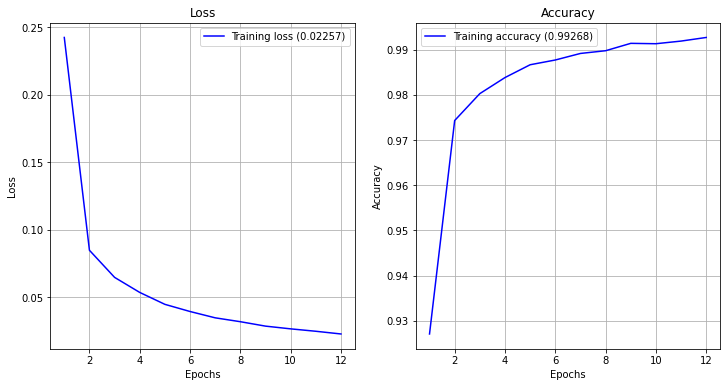

In [25]:
# Ajuste de los parámetros de la red
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=True)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_history(history)

## Preguntas a responder de la celda anterior

¿Qué diferencias observas en el entrenamiento y en los resultados en comparación con las redes diseñadas en el otro Notebook?

[TU RESPUESTA AQUI]

El notebook que entregues deberá incluir:

1.   Modifica la carga de datos, y la configuración inicial de la red si lo ves necesario, para que cargue/utilice el dataset CIFAR10 en lugar de MNIST. Puedes pasar a blanco y negro las imágenes, o hacer que la red trabaje con imagenes en color (n x m x 3), y siempre, normalizar los valores (atributos con valores entre 0 y 1).
2.   Entrena un perceptrón multi-capa y evalúa los resultados que obtiene para CIFAR10. Compara estos resultados con los obtenidos en el dataset anterior (MNIST)
3.   Entrena una red convolucional y evalúa los resultados que obtiene con CIFAR10. Compara estos resultados con los obtenidos para el perceptrón.
4.   Opcional: Repite el último paso, entrenar la red convolucional, utilizando el dataset CIFAR 100, con 100 clases diferentes. En este caso, recuerda asegurarte que el Colab está utilizando una configuración con GPU.

In [26]:
# Carga de datos CIFAR 10

batch_size = 128
num_classes = 10
epochs = 12

# Dimensiones imágenes
cifar_img_rows, cifar_img_cols = 32, 32

(cifar_x_train, cifar_y_train), (cifar_x_test,cifar_y_test
                                 ) = cifar10.load_data()

if K.image_data_format() == 'channels_first':
    cifar_x_train = cifar_x_train.reshape(cifar_x_train.shape[0], 3, 
                                          cifar_img_rows, cifar_img_cols)
    cifar_x_test = cifar_x_test.reshape(cifar_x_test.shape[0], 3, 
                                        cifar_img_rows, cifar_img_cols)
    cifar_input_shape = (3, cifar_img_rows, cifar_img_cols)
else:
    cifar_x_train = cifar_x_train.reshape(cifar_x_train.shape[0], 
                                          cifar_img_rows, cifar_img_cols, 3)
    cifar_x_test = cifar_x_test.reshape(cifar_x_test.shape[0], 
                                        cifar_img_rows, cifar_img_cols, 3)
    cifar_input_shape = (cifar_img_rows, cifar_img_cols, 3)

cifar_x_train = cifar_x_train.astype('float32')
cifar_x_test = cifar_x_test.astype('float32')
cifar_x_train /= 255
cifar_x_test /= 255
print('cifar_x_train shape:', cifar_x_train.shape)
print(cifar_x_train.shape[0], 'train samples')
print(cifar_x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
cifar_y_train = tf.keras.utils.to_categorical(cifar_y_train, num_classes)
cifar_y_test  = tf.keras.utils.to_categorical(cifar_y_test,  num_classes)

cifar_x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 3072)              0         
                                                                 
 dense_41 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
391/391 [==============================] - 1s 3ms/step - loss: 2.0079 - accuracy: 0.2812
Epoch 2/12
391/391 [==============================] - 1s 3ms/step - loss: 1.8750 - accuracy: 0.3423
Epoch 3/12
391/391 [==============================] - 1s 4ms/step - loss: 1.8353 - accuracy: 0.3613
Epoch 4/12
391/391 [==============================] - 1s 3ms/step - loss: 1.8142 - accuracy: 0.3703
Epoch 5/12
391/391 [=========================

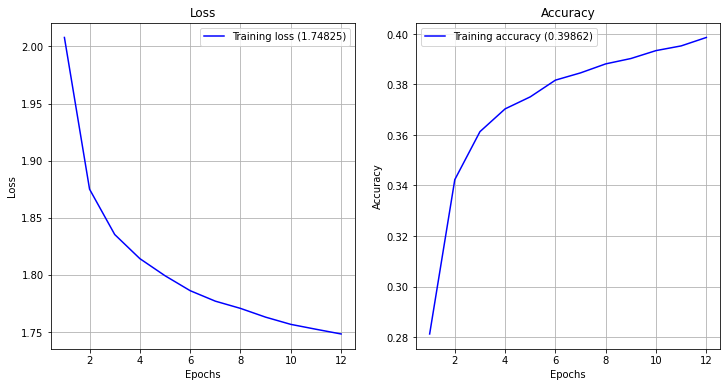

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 3072)              0         
                                                                 
 dense_42 (Dense)            (None, 64)                196672    
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
391/391 [==============================] - 2s 3ms/step - loss: 1.9879 - accuracy: 0.2731
Epoch 2/12
391/391 [==============================] - 1s 3ms/step - loss: 1.8344 - accuracy: 0.3401
Epoch 3/12
391/391 [==============================] - 1s 3ms/step - loss: 1.8032 - accuracy: 0.3495
Epoch 4/12


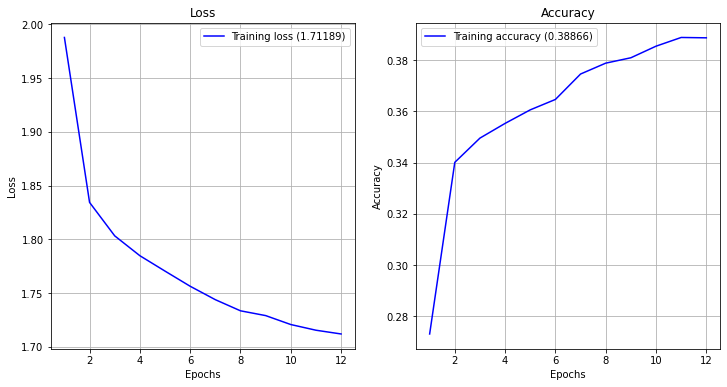

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 3072)              0         
                                                                 
 dense_44 (Dense)            (None, 64)                196672    
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
391/391 [==============================] - 2s 3ms/step - loss: 1.9601 - accuracy: 0.2971
Epoch 2/12
391/391 [==============================] - 1s 3ms/step - loss: 1.796

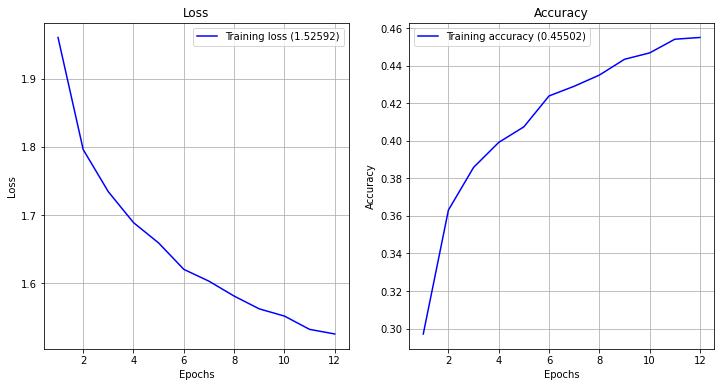

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_24 (Flatten)        (None, 12544)             0         
                                                                 
 dense_47 (Dense)            (None, 128)               1605760   
                                                     

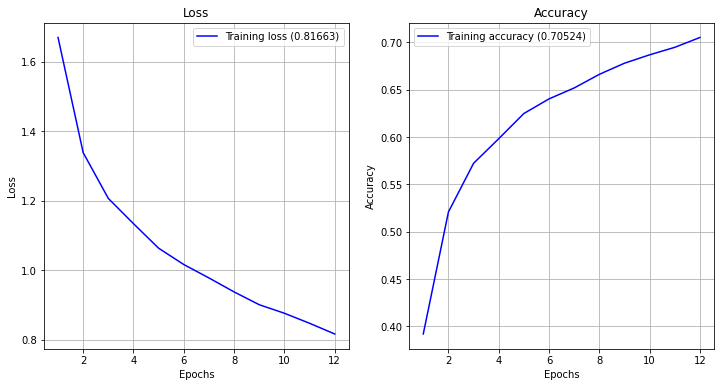

In [28]:
def crearModeloUnaCapa(activation, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=cifar_input_shape))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def crearModeloDosCapas(layerActivation, layerUnits, activation, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=cifar_input_shape))
    model.add(Dense(units=layerUnits, activation=layerActivation))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def crearModeloTresCapas(layerActivation, layerUnits1, layerUnits2, activation,
                        optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=cifar_input_shape))
    model.add(Dense(units=layerUnits1, activation=layerActivation))
    model.add(Dense(units=layerUnits2, activation=layerActivation))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def entrenarModelo(model):
    t0 = time.perf_counter()
    history = model.fit(cifar_x_train, cifar_y_train, batch_size=batch_size, 
                        epochs=epochs, verbose=True)
    train_time = time.perf_counter() - t0
    print('%s %.3f%s' %  ('Training time: ', train_time, 's'))
    plot_history(history)
    return history


def crearModeloConvolucional():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=cifar_input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                  optimizer=Adam(), metrics=['accuracy'])
    model.summary()
    return model

modeloUnaCapa = crearModeloUnaCapa(activation="softmax", optimizer=SGD())
historyUnaCapa = entrenarModelo(modeloUnaCapa)

modeloDosCapas = crearModeloDosCapas(layerActivation="relu", layerUnits = 64,
                                    activation="softmax", 
                                    optimizer=Adam())
historyDosCapas = entrenarModelo(modeloDosCapas)

modeloTresCapas = crearModeloTresCapas(layerActivation="relu", 
                                        layerUnits1 = 64, layerUnits2 = 32, 
                                        activation="softmax", 
                                        optimizer=Adam())
historyTresCapas = entrenarModelo(modeloTresCapas)

modeloConvolucional = crearModeloConvolucional()
historyConvolucional = entrenarModelo(modeloConvolucional)

| Tipo red   | Accuracy
| ---        | ---          |
| Perceptrón softmax + optimización SDG | 0.3986 |
| Capa oculta ReLu + salida softmax + optimización Adam  | 0.3886 |
| 2 capas ocultas ReLu + salida softmax + optimización Adam | 0.4550 |
| Red convolucional | 0.7054 |

La red convolucional tiene muchos mejores resultados pero tarda casi minuto y medio en entrenar la red frente al MLP.